### Importação dos dados



In [60]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

#mostra as 5 primeiras linhas de cada DataFrame (loja, loja1, loja12, loja3)
loja3.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,Camila Ribeiro,CE,4,cartao_credito,4,-5.20,-39.53
1,Cômoda,moveis,386.81,18.180908,10/02/2021,Larissa Alves,RS,3,cartao_credito,1,-30.17,-53.50
2,Violão,instrumentos musicais,404.62,23.197592,22/01/2023,Lucas Oliveira,SP,5,cartao_credito,3,-22.19,-48.79
3,Bola de vôlei,esporte e lazer,78.40,4.463341,22/03/2022,Pedro Gomes,BA,4,cartao_credito,6,-13.29,-41.71
4,Guarda roupas,moveis,694.76,34.578319,12/01/2022,Bianca Santos,SP,1,cartao_credito,1,-22.19,-48.79


#1. Análise do faturamento


In [135]:
def analisar_faturamento(loja, nome_loja):
  """
  Função para calcular e exibir o faturamento total de cada loja.

  Parâmetros:
  lojas (list): Lista de tuplas com os DataFrames das lojas e seus respectivos nomes.
  nome_loja: nome da loja a exibir
  """
  faturamento = loja['Preço'].sum()
  print(f'Faturamento Total da {nome_loja}: {faturamento}')


faturamento_loja1 = analisar_faturamento(loja, 'Loja 1')
faturamento_loja2 = analisar_faturamento(loja2, 'Loja 2')
faturamento_loja3 = analisar_faturamento(loja3, 'Loja 3')
faturamento_loja4 = analisar_faturamento(loja4, 'Loja 4')



Faturamento Total da Loja 1: 1384497.58
Faturamento Total da Loja 2: 1488459.06
Faturamento Total da Loja 3: 1464025.03
Faturamento Total da Loja 4: 1384497.58


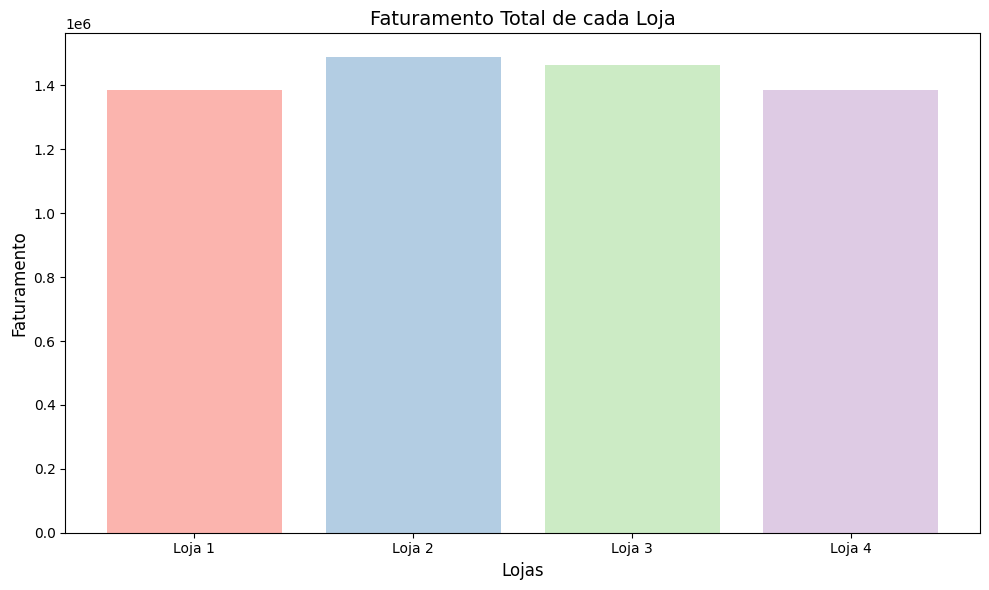

In [136]:
import matplotlib.pyplot as plt

def gerar_grafico_faturamento_total(lojas_dados):
    """
    Gera um gráfico de barras com o faturamento total de cada loja.

    Parâmetros:
    lojas_dados (list): Lista de tuplas com o DataFrame da loja e o nome da loja.
    """
    nomes_lojas = []
    valores_faturamento = []

    for loja, nome_loja in lojas_dados:
        nomes_lojas.append(nome_loja)
        valores_faturamento.append(loja['Preço'].sum())

    plt.figure(figsize=(10, 6))
    plt.bar(nomes_lojas, valores_faturamento, color=plt.cm.Pastel1.colors)

    plt.title('Faturamento Total de cada Loja', fontsize=14)
    plt.xlabel('Lojas', fontsize=12)
    plt.ylabel('Faturamento', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


lojas = [(loja, 'Loja 1'), (loja2, 'Loja 2'), (loja3, 'Loja 3'), (loja4, 'Loja 4')]
gerar_grafico_faturamento_total(lojas)


# 2. Vendas por Categoria


In [177]:
def faturamento_por_categoria_mais_populares(loja, nome_loja):
    """
    Função que agrupa e mostra as categorias mais populares (com base nas vendas) por loja.

    Parâmetros:
    loja (DataFrame): Dados da loja.
    nome_loja (str): Nome da loja para exibição.
    """
    quantidade_categoria = loja.groupby('Categoria do Produto').size().reset_index(name='Quantidade de Vendas')

    quantidade_categoria = quantidade_categoria.sort_values(by='Quantidade de Vendas', ascending=False)

    print(f'\nCategorias mais populares - {nome_loja}:')
    print(quantidade_categoria)

    #print(type(quantidade_categoria))

    return quantidade_categoria



faturamento_loja1 = faturamento_por_categoria_mais_populares(loja, 'Loja 1')
faturamento_loja2 = faturamento_por_categoria_mais_populares(loja2, 'Loja 2')
faturamento_loja3 = faturamento_por_categoria_mais_populares(loja3, 'Loja 3')
faturamento_loja4 = faturamento_por_categoria_mais_populares(loja4, 'Loja 4')




Categorias mais populares - Loja 1:
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   480
2            eletronicos                   451
0             brinquedos                   338
3        esporte e lazer                   277
1       eletrodomesticos                   254
7  utilidades domesticas                   201
5                 livros                   187
4  instrumentos musicais                   170

Categorias mais populares - Loja 2:
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   442
2            eletronicos                   422
0             brinquedos                   313
1       eletrodomesticos                   305
3        esporte e lazer                   275
4  instrumentos musicais                   224
5                 livros                   197
7  utilidades domesticas                   181

Categorias mais populares - Loja 3:
    Categoria do Produto  Quantidade de Ven

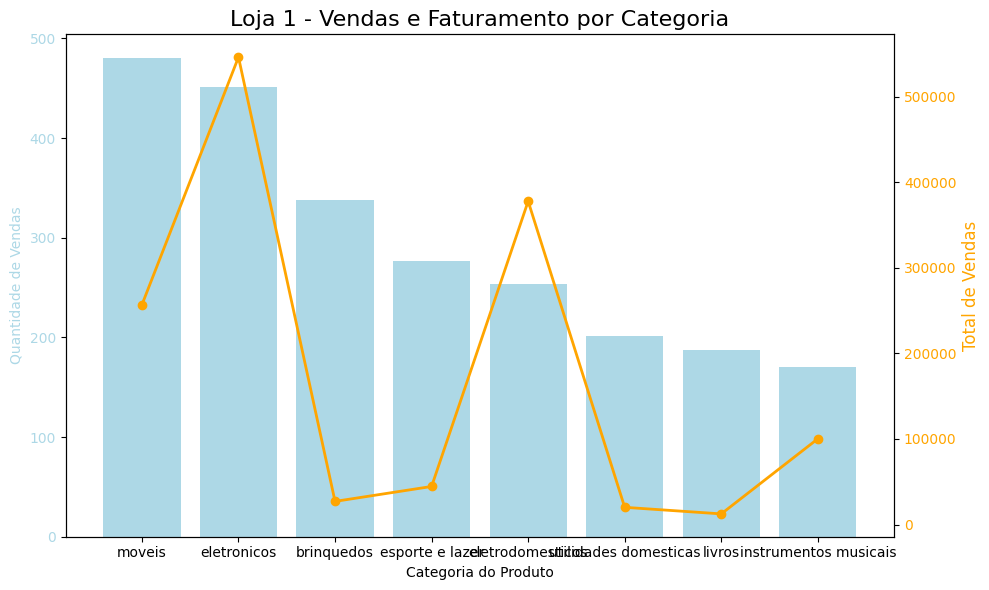

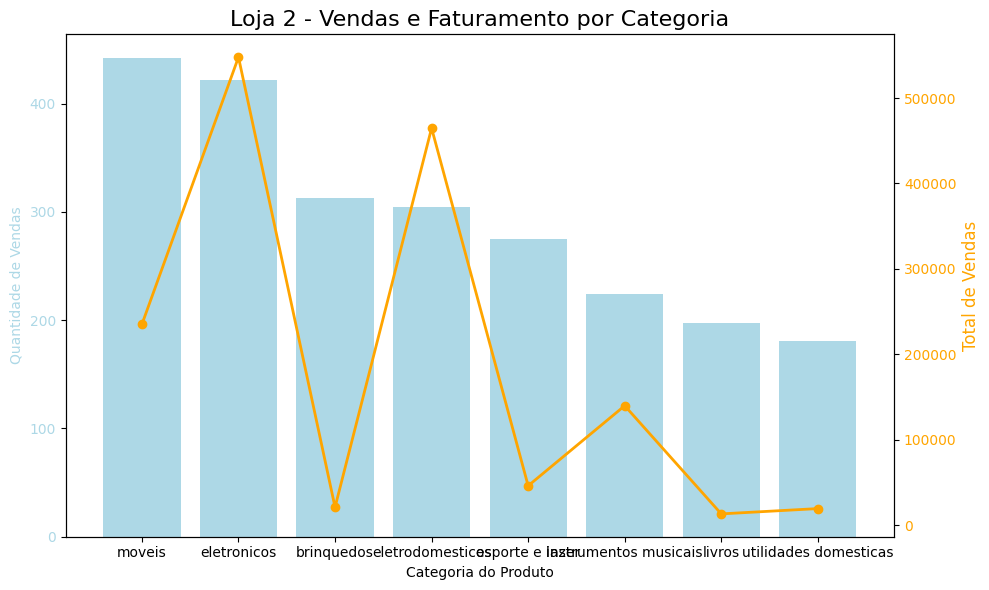

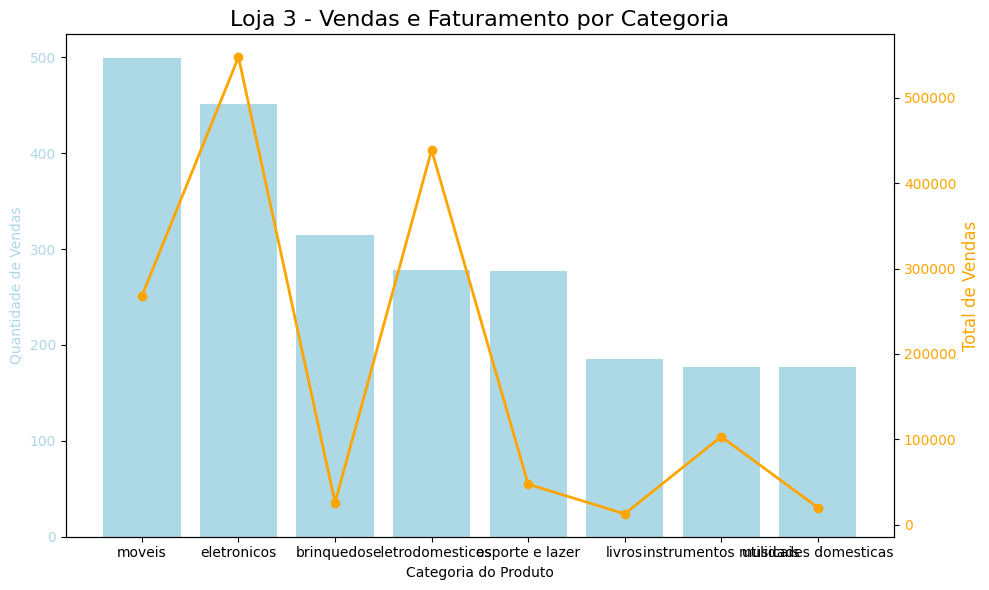

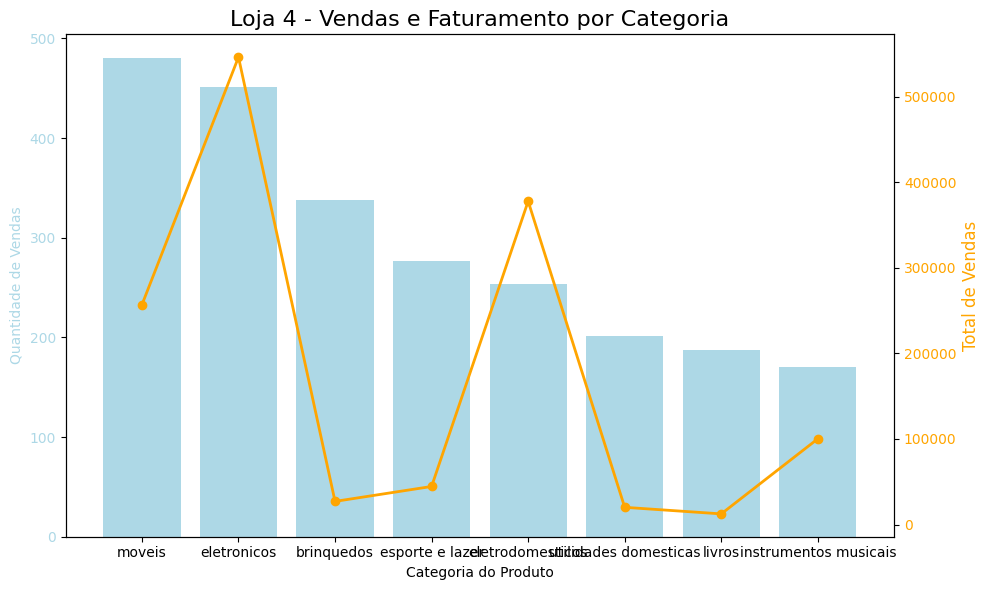

In [134]:
import matplotlib.pyplot as plt

def grafico_barras_linha(loja, nome_loja):
    """
    Função que gera um gráfico de barras com uma linha para mostrar as vendas e faturamento
    por categoria de produto.

    Parâmetros:
    loja (DataFrame): Dados da loja.
    nome_loja (str): Nome da loja para exibição.
    """
    quantidade_categoria = loja.groupby('Categoria do Produto').size().reset_index(name='Quantidade de Vendas')

    faturamento_categoria = loja.groupby('Categoria do Produto')['Preço'].sum().reset_index(name='Faturamento')

    categorias = pd.merge(quantidade_categoria, faturamento_categoria, on='Categoria do Produto')

    categorias = categorias.sort_values(by='Quantidade de Vendas', ascending=False)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.bar(categorias['Categoria do Produto'], categorias['Quantidade de Vendas'], color='lightblue', label='Quantidade de Vendas')
    ax1.set_xlabel('Categoria do Produto')
    ax1.set_ylabel('Quantidade de Vendas', color='lightblue')
    ax1.tick_params(axis='y', labelcolor='lightblue')

    ax2 = ax1.twinx()
    ax2.plot(categorias['Categoria do Produto'], categorias['Faturamento'], color='orange', marker='o', label='Faturamento', linewidth=2)
    ax2.set_ylabel('Faturamento', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    plt.title(f'{nome_loja} - Vendas e Faturamento por Categoria', fontsize=16)
    plt.ylabel('Total de Vendas', fontsize=12)
    plt.xticks(rotation=10, ha='right', fontsize=1)
    fig.tight_layout()

    plt.show()


grafico_barras_linha(loja, 'Loja 1')
grafico_barras_linha(loja2, 'Loja 2')
grafico_barras_linha(loja3, 'Loja 3')
grafico_barras_linha(loja4, 'Loja 4')


# 3. Média de Avaliação das Lojas

In [158]:
# print(loja.columns)

# avaliacao_compra = loja['Avaliação da compra'].sum()
# media_loja1 = avaliacao_compra / len(loja['Avaliação da compra'])
def avaliacao_media(loja, nome_loja):
  """
  Função para calcular e exibir a média de avaliação por cada loja.

  Parâmetros:
  loja (DataFrame): O DataFrame contendo os dados da loja.
  nome_loja (str): Nome da loja para exibição.

  Build-Function:
  .mean(): calcular a média

  """
  media_loja = loja['Avaliação da compra'].mean()
  print(f'Média da {nome_loja}: {media_loja: .2f}')

avaliacao_media(loja, 'Loja 1')
avaliacao_media(loja2, 'Loja 2')
avaliacao_media(loja3, 'Loja 3')
avaliacao_media(loja4, 'Loja 4')




Média da Loja 1:  4.00
Média da Loja 2:  4.04
Média da Loja 3:  4.05
Média da Loja 4:  4.00


# 4. Produtos Mais e Menos Vendidos

In [185]:
def produtos_mais_menos_vendidos(loja, nome_loja):
  """
  Função para verificar os produtos mais e menos vendidos em cada loja .

  Parâmetros:
  loja (DataFrame): O DataFrame contendo os dados da loja.
  nome_loja (str): Nome da loja para exibição.

  """
  vendas_produto = loja.groupby('Produto')['Preço'].sum()

  produto_mais_vendido = vendas_produto.sort_values(ascending=False).head(1)
  produto_menos_vendido = vendas_produto.sort_values(ascending=False).tail(1)

  print(f'\n{nome_loja}')
  print(f'Produto mais vendido: \n{produto_mais_vendido}')
  print(f'Produto menos vendido: \n{produto_menos_vendido}')

lojas = [(loja, 'Loja 1'),(loja2, 'Loja 2'), (loja3, 'Loja 3'), (loja4, 'Loja 4') ]

for loja, nome in lojas:
  produtos_mais_menos_vendidos(loja, nome)





Loja 1
Produto mais vendido: 
Produto
Celular Plus X42    128930.07
Name: Preço, dtype: float64
Produto menos vendido: 
Produto
Corda de pular    939.74
Name: Preço, dtype: float64

Loja 2
Produto mais vendido: 
Produto
Celular Plus X42    150967.83
Name: Preço, dtype: float64
Produto menos vendido: 
Produto
Cubo mágico 8x8    858.22
Name: Preço, dtype: float64

Loja 3
Produto mais vendido: 
Produto
Geladeira    133185.99
Name: Preço, dtype: float64
Produto menos vendido: 
Produto
Cubo mágico 8x8    853.81
Name: Preço, dtype: float64

Loja 4
Produto mais vendido: 
Produto
Celular Plus X42    128930.07
Name: Preço, dtype: float64
Produto menos vendido: 
Produto
Corda de pular    939.74
Name: Preço, dtype: float64


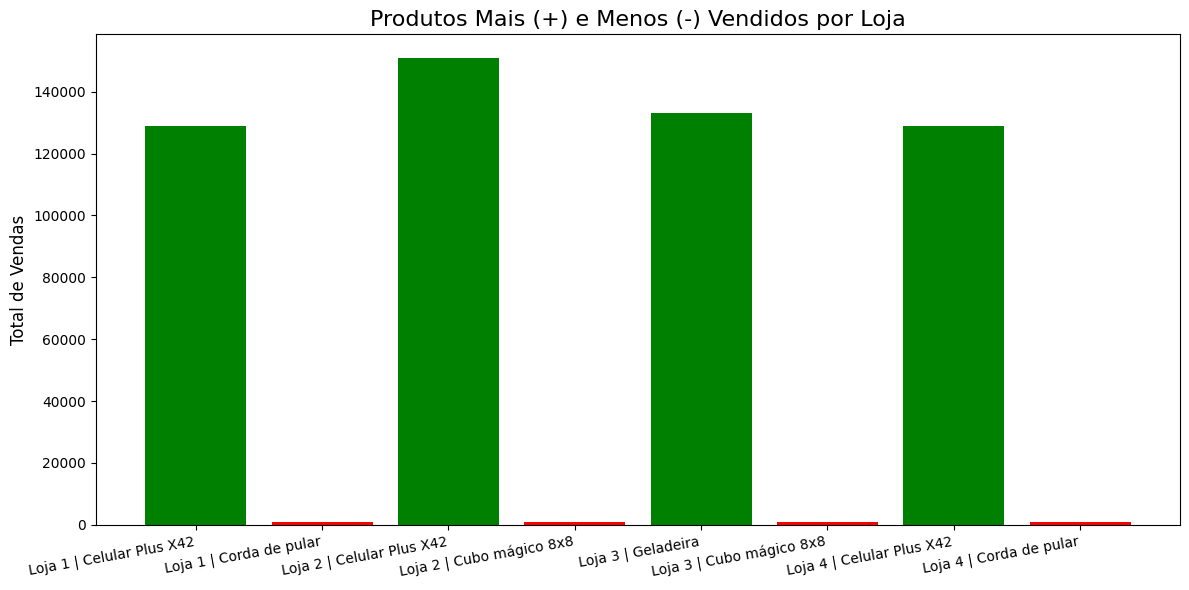

[('Loja 1 | Celular Plus X42', np.float64(128930.06999999999)),
 ('Loja 1 | Corda de pular', np.float64(939.74)),
 ('Loja 2 | Celular Plus X42', np.float64(150967.83)),
 ('Loja 2 | Cubo mágico 8x8', np.float64(858.22)),
 ('Loja 3 | Geladeira', np.float64(133185.99)),
 ('Loja 3 | Cubo mágico 8x8', np.float64(853.8100000000001)),
 ('Loja 4 | Celular Plus X42', np.float64(128930.06999999999)),
 ('Loja 4 | Corda de pular', np.float64(939.74))]

In [188]:
import matplotlib.pyplot as plt

def obter_dados_mais_menos(loja, nome_loja):
    vendas_produto = loja.groupby('Produto')['Preço'].sum()
    produto_mais_vendido = vendas_produto.sort_values(ascending=False).head(1)
    produto_menos_vendido = vendas_produto.sort_values(ascending=False).tail(1)

    # Retorna tuplas com nome_loja + nome_produto e valor total
    return [
        (f'{nome_loja} | {produto_mais_vendido.index[0]}', produto_mais_vendido.values[0]),
        (f'{nome_loja} | {produto_menos_vendido.index[0]}', produto_menos_vendido.values[0])
    ]

dados = []
for loja, nome in lojas:
    dados.extend(obter_dados_mais_menos(loja, nome))

# Separar para o gráfico
labels = [item[0] for item in dados]
valores = [item[1] for item in dados]
cores = ['green', 'red'] * 4


plt.figure(figsize=(12, 6))
plt.bar(labels, valores, color=cores)
plt.title('Produtos Mais (+) e Menos (-) Vendidos por Loja', fontsize=16)
plt.ylabel('Total de Vendas', fontsize=12)
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.savefig('obter_dados_mais_menos.png', dpi=300, bbox_inches='tight')
plt.show()

dados


# 5. Frete Médio por Loja


In [80]:
def media_loja_frete(loja, nome_loja):
    """
    Função para calcular e exibir a média de frete de uma loja.

    Parâmetros:
    loja (DataFrame): O DataFrame contendo os dados da loja.
    nome_loja (str): Nome da loja para exibição.
    """
    media_frete = loja['Frete'].mean()
    print(f'Média de Frete para {nome_loja}: {media_frete}')

lojas = [(loja, 'Loja 1'), (loja2, 'Loja 2'), (loja3, 'Loja 3'), (loja4, 'Loja 4')]

for loja, nome in lojas:
    media_loja_frete(loja, nome)



Média de Frete para Loja 1: 31.278997081841727
Média de Frete para Loja 2: 33.62194065817927
Média de Frete para Loja 3: 33.07446427411743
Média de Frete para Loja 4: 31.278997081841727


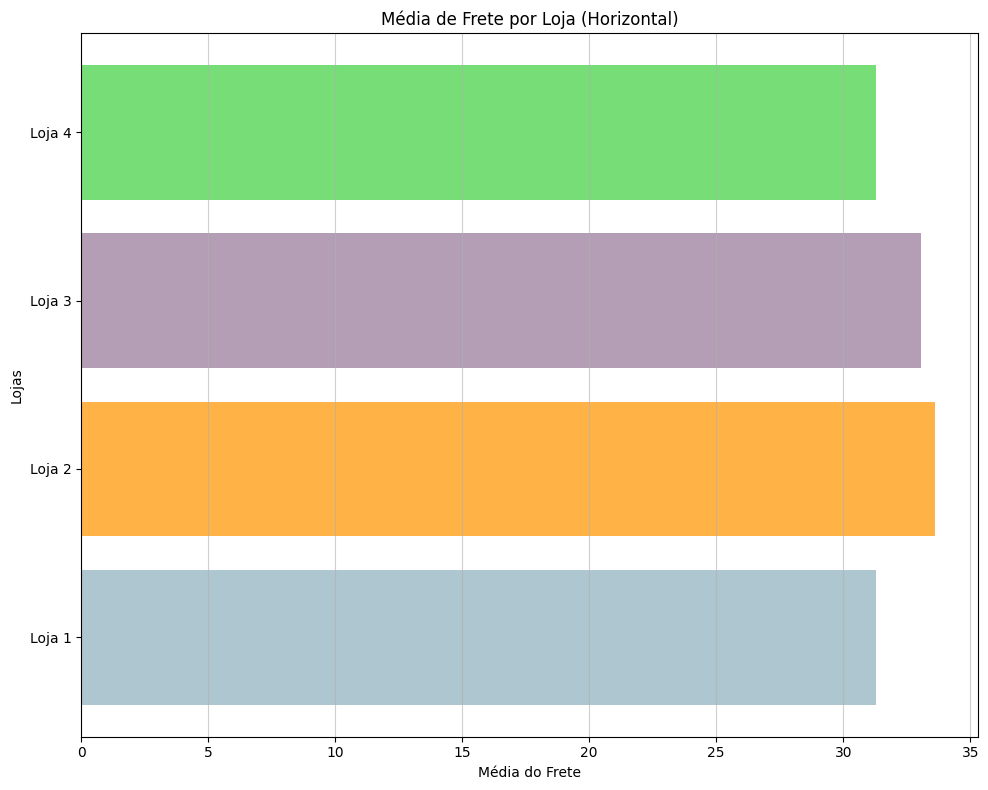

In [148]:
import matplotlib.pyplot as plt

medias = {
    'Loja 1': loja['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean(),
}

lojas = list(medias.keys())
valores = list(medias.values())
cores_pastel = ['#AEC6CF', '#FFB347', '#B39EB5', '#77DD77']


plt.figure(figsize=(10,8))
plt.barh(lojas, valores, color=cores_pastel)

plt.title('Média de Frete por Loja (Horizontal)')
plt.xlabel('Média do Frete')
plt.ylabel('Lojas')
plt.grid(axis='x', linestyle='-', alpha=0.6)

plt.tight_layout()
plt.show()


# 6. Relatório Final


Esta análise tem como objetivo auxiliar o Sr. João, proprietário de quatro lojas, a identificar qual delas apresenta o desempenho mais fraco e, portanto, seria a mais adequada para ser vendida, permitindo novos investimentos estratégicos. A seguir, analisaremos detalhadamente o desempenho de cada loja em diferentes critérios e, ao final, apresentaremos uma recomendação conclusiva sobre qual loja deve ser descontinuada.

### 1. Faturamento Total

Quanto ao faturamento total, a Loja 2 obteve o melhor desempenho, com um valor de 1.488.459,06. Por outro lado, a Loja 1 apresentou o menor faturamento, totalizando 1.384.497,58.
Essa diferença representa um crescimento de aproximadamente 7,49% no faturamento da Loja 2 em relação à Loja 1.



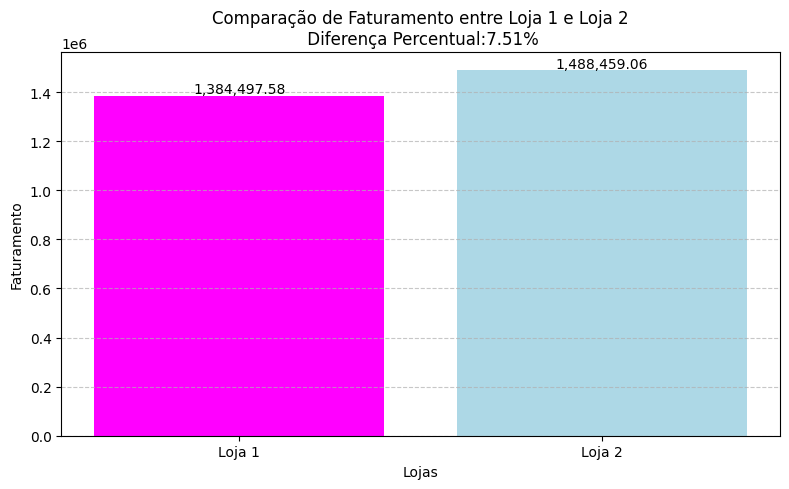

In [170]:

import matplotlib.pyplot as plt

faturamento_loja2 = faturamento_loja2
faturamento_loja1 = faturamento_loja1

diferenca_percentual = ((faturamento_loja2 - faturamento_loja1) / faturamento_loja1) * 100
#print(f'Diferença percentual: {diferenca_percentual:.2f}%')

lojas = ['Loja 1', 'Loja 2']
faturamentos = [faturamento_loja1, faturamento_loja2]

plt.figure(figsize=(8, 5))
plt.bar(lojas, faturamentos, color=['magenta', 'lightblue'])
plt.title(f'Comparação de Faturamento entre Loja 1 e Loja 2\n Diferença Percentual:{diferenca_percentual:.2f}%')
plt.ylabel('Faturamento')
plt.xlabel('Lojas')

for i, valor in enumerate(faturamentos):
    plt.text(i, valor + 10000, f'{valor:,.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 2. Vendas por Categoria

A categoria mais popular entre as quatro lojas é **Móveis**, seguida por **Eletrônicos** e **Brinquedos**. Dentre as lojas analisadas, a Loja 3 obteve o melhor desempenho, somando um total de 1.265 nas três categorias mais vendidas. Por outro lado, a Loja 2 apresentou o menor desempenho, com um total de 1.177 nessas mesmas categorias.

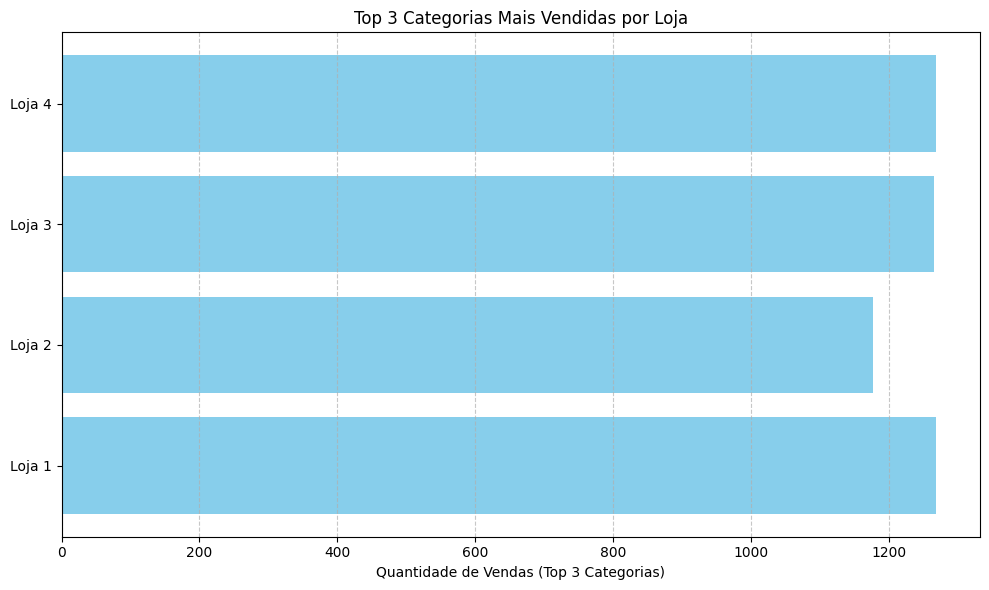

Soma das 3 primeiras categorias - Loja 1: 1269
Soma das 3 primeiras categorias - Loja 2: 1177
Soma das 3 primeiras categorias - Loja 3: 1265
Soma das 3 primeiras categorias - Loja 4: 1269


In [183]:
import matplotlib.pyplot as plt

top3_loja1 = faturamento_loja1.head(3)
top3_loja2 = faturamento_loja2.head(3)
top3_loja3 = faturamento_loja3.head(3)
top3_loja4 = faturamento_loja4.head(3)

soma_top3_loja1 = top3_loja1['Quantidade de Vendas'].sum()
soma_top3_loja2 = top3_loja2['Quantidade de Vendas'].sum()
soma_top3_loja3 = top3_loja3['Quantidade de Vendas'].sum()
soma_top3_loja4 = top3_loja4['Quantidade de Vendas'].sum()

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
vendas = [soma_top3_loja1, soma_top3_loja2, soma_top3_loja3, soma_top3_loja4]

plt.figure(figsize=(10, 6))
plt.barh(lojas, vendas, color='skyblue')
plt.xlabel('Quantidade de Vendas (Top 3 Categorias)')
plt.title('Top 3 Categorias Mais Vendidas por Loja')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print(f'Soma das 3 primeiras categorias - Loja 1: {soma_top3_loja1}')
print(f'Soma das 3 primeiras categorias - Loja 2: {soma_top3_loja2}')
print(f'Soma das 3 primeiras categorias - Loja 3: {soma_top3_loja3}')
print(f'Soma das 3 primeiras categorias - Loja 4: {soma_top3_loja4}')


### 3. Média de Avaliação das Lojas

A Loja 3 obteve a melhor avaliação de compra, com uma média de 4,05, seguida pela Loja 2 com 4,04. As Lojas 1 e 4 apresentaram a mesma média de 4,0.







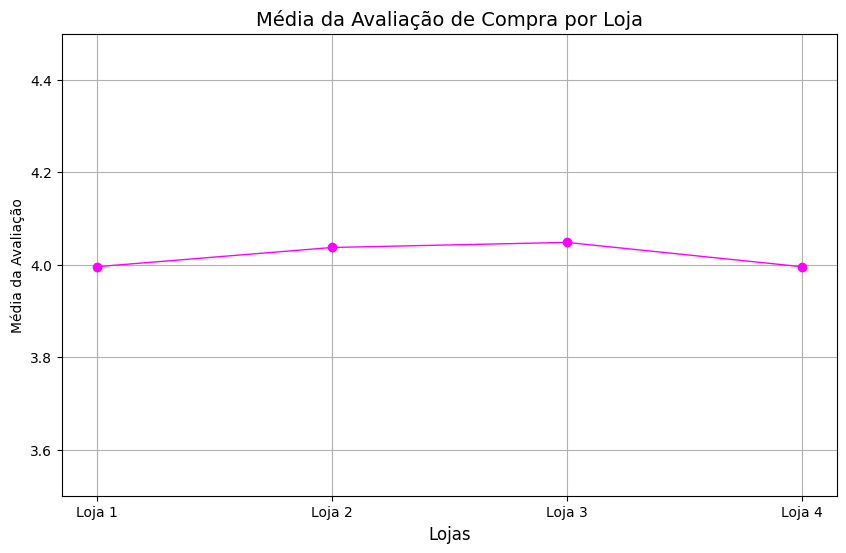

In [160]:
import matplotlib.pyplot as plt

def grafico_media_avaliacao(lojas, nomes_lojas):
    medias = [loja['Avaliação da compra'].mean() for loja in lojas]

    plt.figure(figsize=(10, 6))
    plt.plot(nomes_lojas, medias, marker='o', linestyle='-', color='magenta', linewidth=1)
    plt.title('Média da Avaliação de Compra por Loja', fontsize=14)
    plt.xlabel('Lojas', fontsize=12)
    plt.ylabel('Média da Avaliação', fontsize=10)
    plt.grid(True)
    plt.ylim(3.5, 4.5)
    plt.show()

lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

grafico_media_avaliacao(lojas, nomes)


### 4. Produtos Mais e Menos Vendidos

A Loja 2 teve o melhor desempenho em termos de faturamento do produto mais vendido, o **Celular Plus X42**, que somoub 150.967,83. Em comparação, a Loja 1 também teve o Celular Plus X42 como seu produto mais vendido, mas o faturamento foi de 128.930,07. Por outro lado, a Loja 3 teve a **Geladeira** como seu produto mais vendido, totalizando 133.185,99. Quanto aos produtos menos vendidos, a Loja 1 e a Loja 4 tiveram como item de menor desempenho a **Corda de pular**, enquanto a Loja 2 e a Loja 3 registraram o **Cubo mágico 8x8** como o produto menos vendido. Em resumo, a Loja 2 apresentou o melhor desempenho, seguida pela Loja 3, com destaque para as Geladeiras.

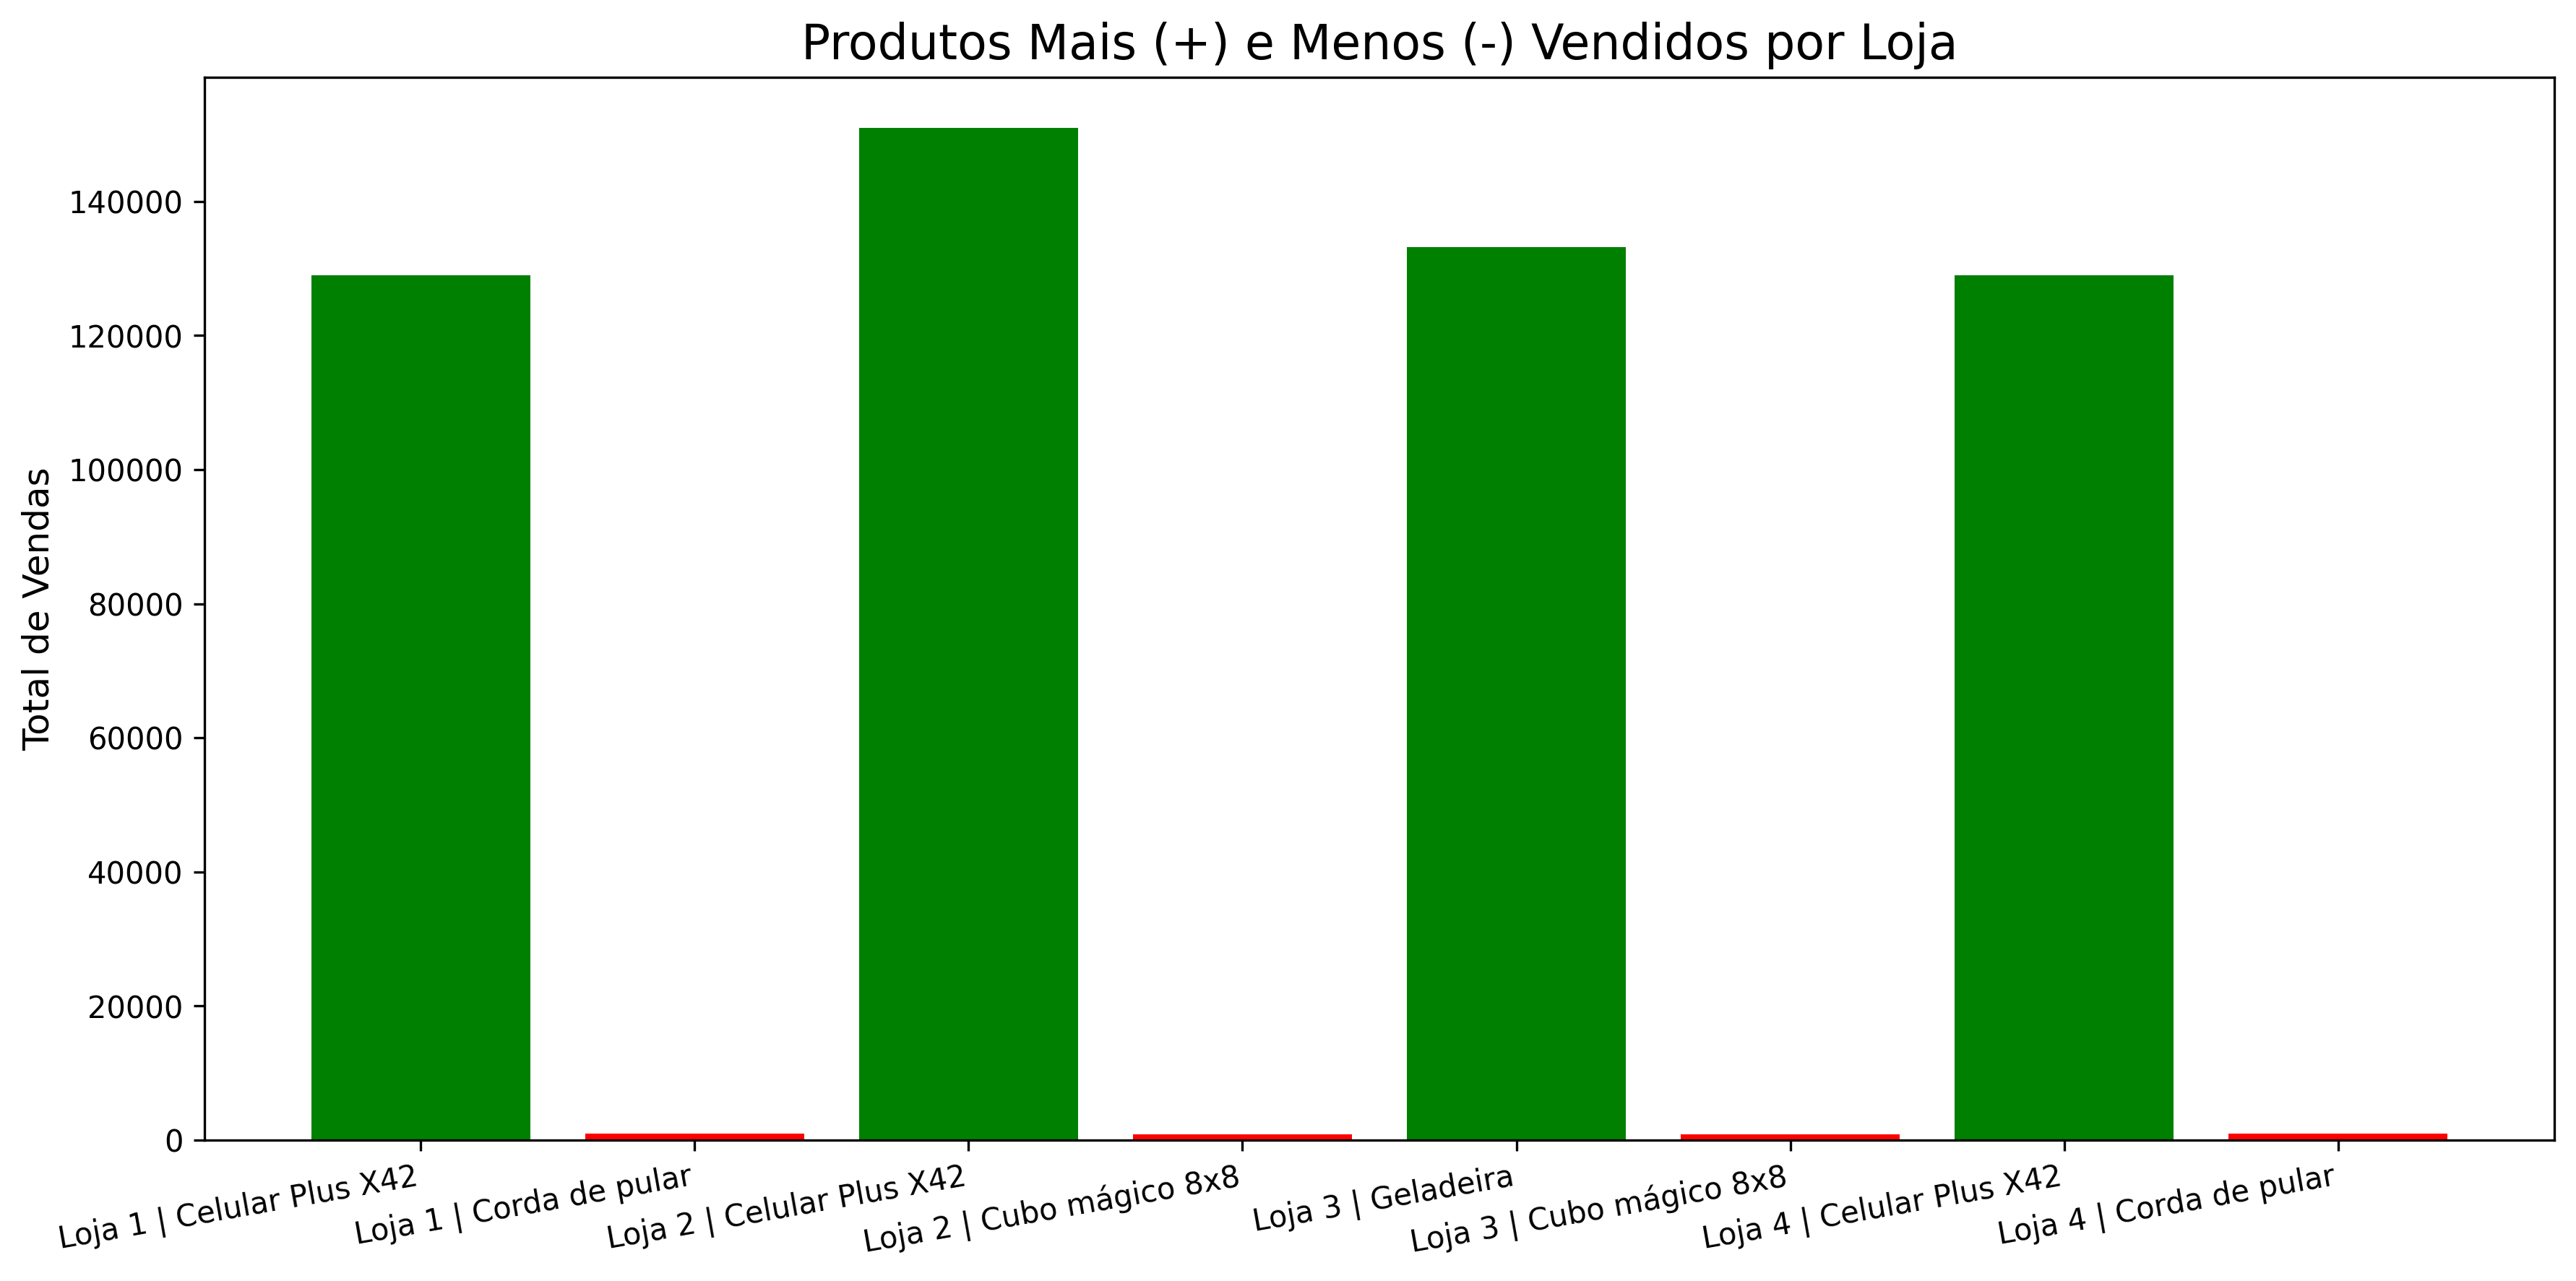

In [191]:
from IPython.display import Image, display

# Exibir a imagem salva
display(Image(filename='obter_dados_mais_menos.png'))


### 5. Frete Médio por Loja


A Loja 1 e a Loja 4 apresentam o menor frete médio, com uma média de 31,28 -
 seguidas pela Loja 3, com um frete médio de 33,07, e pela Loja 2, que registrou o maior valor, 33,62.


## Conclusão

Com base nos dados apresentados ao longo dessa análise, a loja com o desempenho mais fraco é a Loja 1. Ela apresenta o menor faturamento, e o produto mais vendido também é comercializado na Loja 2. Além disso, a Loja 1 possui o menor custo de frete, sendo este o único fator relevante caso o Sr. João deseje reduzir exclusivamente os custos logísticos. No entanto, o desempenho geral da Loja 1 é inferior ao das outras lojas em diversos aspectos. A venda dessa loja poderia permitir que o Sr. João redirecionasse seus investimentos para as lojas com melhores perspectivas de crescimento e rentabilidade no longo prazo, como a Loja 2 e a Loja 3.

A Loja 2 destaca-se pelo faturamento total, embora apresente o maior custo médio de frete. Em comparação, a Loja 3 tem um desempenho ligeiramente inferior em faturamento total, mas se destaca pela avaliação de compra dos clientes.

# 7. Análise de Desempenho Geográfico

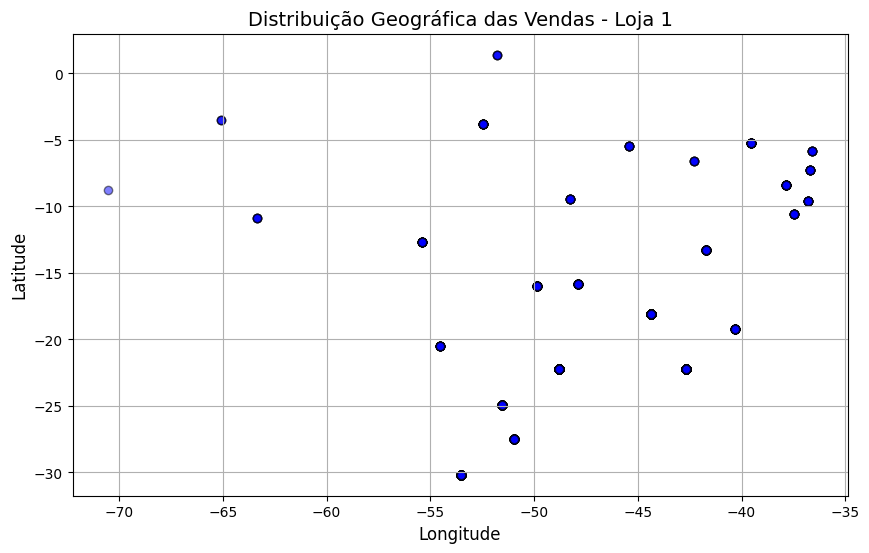

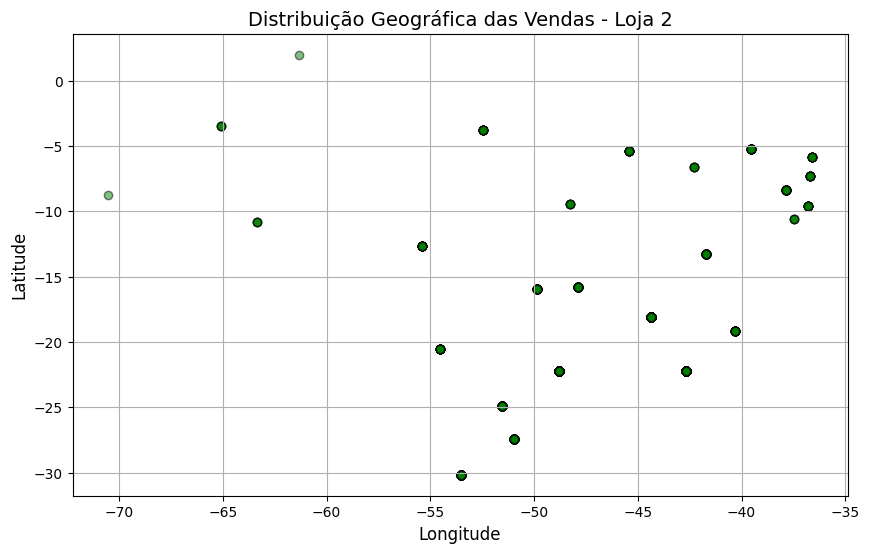

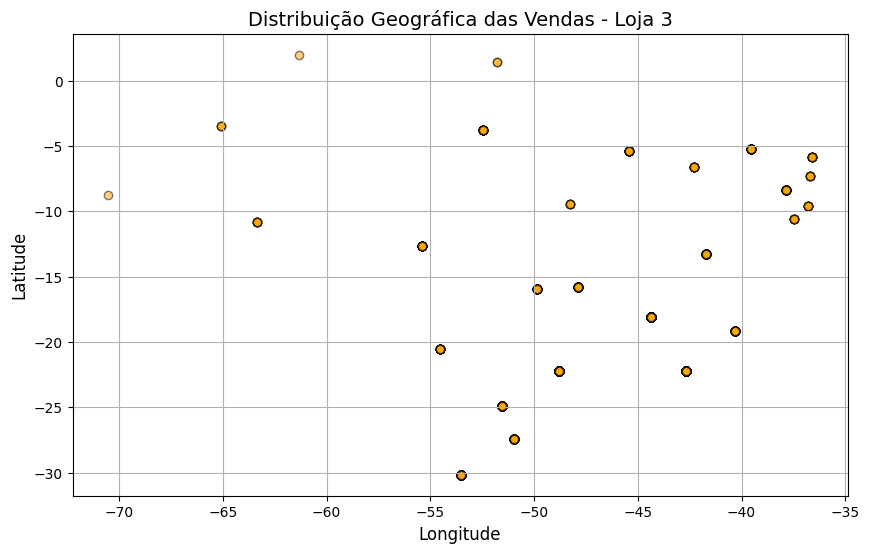

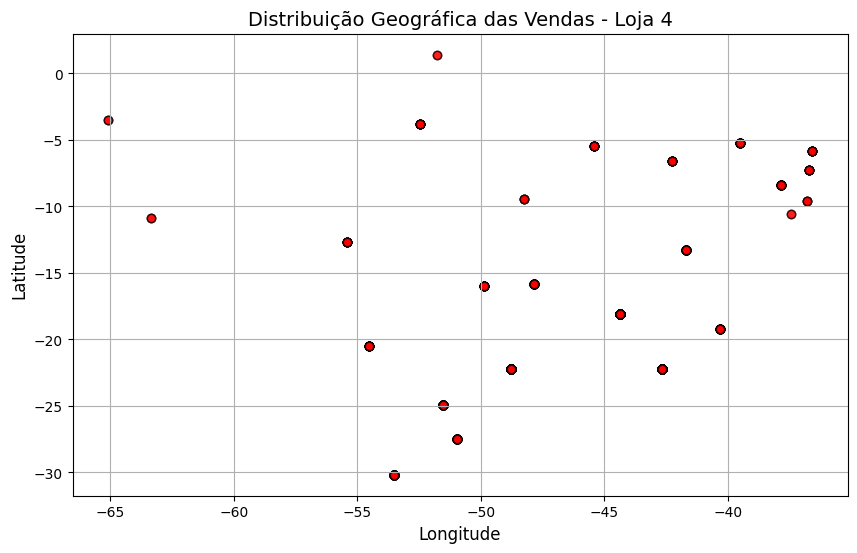

In [61]:
def grafico_dispersao(loja, cor, titulo):
    plt.figure(figsize=(10, 6))
    plt.scatter(loja['lon'], loja['lat'], alpha=0.5, c=cor, edgecolors='k')
    plt.title(f'Distribuição Geográfica das Vendas - {titulo}', fontsize=14)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.grid(True)
    plt.show()

grafico_dispersao(loja, 'blue', 'Loja 1')
grafico_dispersao(loja2, 'green', 'Loja 2')
grafico_dispersao(loja3, 'orange', 'Loja 3')
grafico_dispersao(loja4, 'red', 'Loja 4')


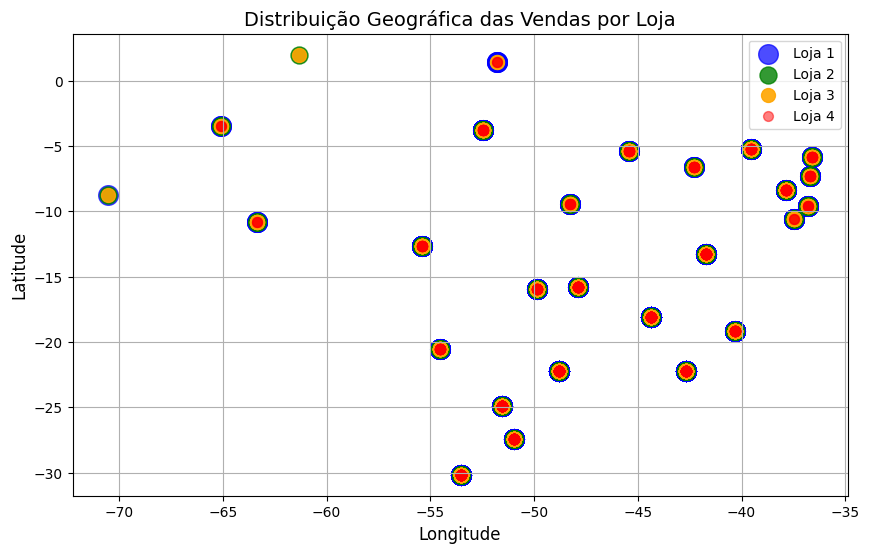

In [62]:
plt.figure(figsize=(10, 6))

plt.scatter(loja['lon'], loja['lat'], alpha=0.7, c='blue', s=200, label='Loja 1')
plt.scatter(loja2['lon'], loja2['lat'], alpha=0.8, c='green', s=150, label='Loja 2')
plt.scatter(loja3['lon'], loja3['lat'], alpha=0.9, c='orange', s= 100, label='Loja 3')
plt.scatter(loja4['lon'], loja4['lat'], alpha=0.5, c='red', s= 50, label='Loja 4')

plt.title('Distribuição Geográfica das Vendas por Loja', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()




Este gráfico mostra que as quatro lojas operam em regiões geográficas semelhantes, com muitos pontos localizados próximos uns dos outros. Devido a essa proximidade, há uma sobreposição das coordenadas, o que faz com que os marcadores de diferentes lojas se sobreponham visualmente no mapa. Isso indica que as lojas compartilham áreas de atuação semelhantes ou atendem a mercados próximos.


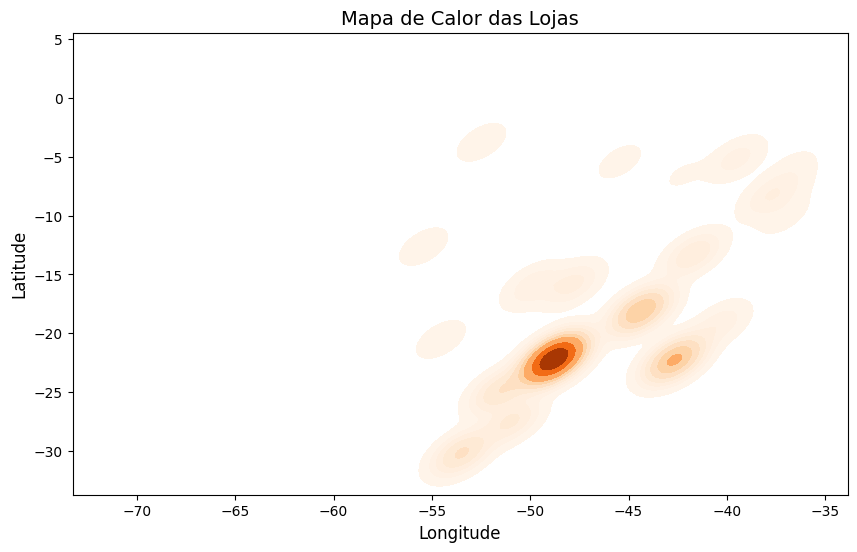

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

lojas = pd.DataFrame({
    'lon': pd.concat([loja['lon'], loja2['lon'], loja3['lon'], loja4['lon']]),
    'lat': pd.concat([loja['lat'], loja2['lat'], loja3['lat'], loja4['lat']])
})

plt.figure(figsize=(10, 6))
sns.kdeplot(x=lojas['lon'], y=lojas['lat'], cmap='Oranges', fill=True, thresh=0.05)

plt.title('Mapa de Calor das Lojas', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()


O mapa de calor é uma representação visual da distribuição geográfica das lojas, com base em suas coordenadas de latitude e longitude.

As cores em tons de laranja indicam a densidade das lojas em determinadas regiões:

1. As áreas em laranja mais **escuro** representam os pontos com maior concentração de lojas.

2. As áreas em tons mais **claros** indicam regiões com menor densidade.

3. As regiões **sem coloração** são locais onde não há presença significativa de lojas, segundo os dados analisados.

A concentração mais intensa de lojas está localizada entre as longitudes -50 e -40, e latitudes entre aproximadamente -30 e -10.

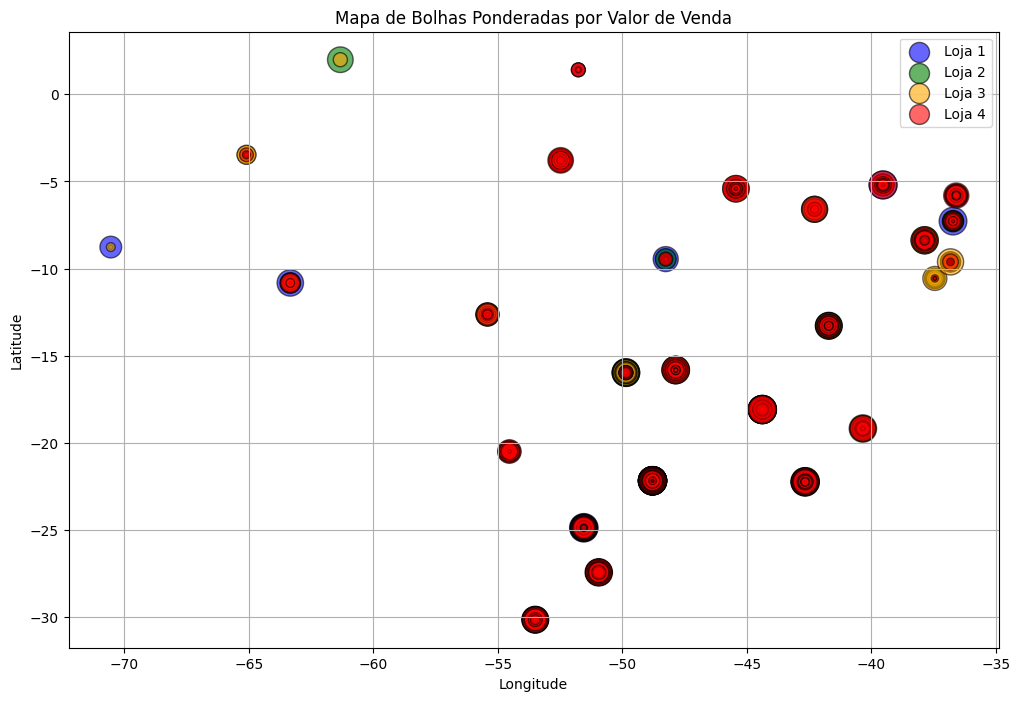

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

dados = pd.concat([loja, loja2, loja3, loja4])

dados['Total_Venda'] = dados['Preço'] + dados['Frete']

plt.figure(figsize=(12, 8))
cores = {'Loja 1': 'blue', 'Loja 2': 'green', 'Loja 3': 'orange', 'Loja 4': 'red'}

for loja in dados['Loja'].unique():
    subset = dados[dados['Loja'] == loja]
    plt.scatter(
        subset['lon'], subset['lat'],
        s=subset['Total_Venda'] / 10,
        alpha=0.6,
        label=loja,
        color=cores[loja],
        edgecolors='black'
    )

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapa de Bolhas Ponderadas por Valor de Venda')
plt.legend()
plt.grid(True)
plt.show()


Com esse mapa, observamos que todas as lojas operam em áreas semelhantes, a sobreposição também pode indicar concorrência entre as unidades em algumas regiões.